Homework3-1: Data Mining
1.基础信息获取爬虫

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

driver = webdriver.Edge()
url = 'https://cq.esf.fang.com/house-a058-b013070/'
driver.get(url)

# 定位到租房列表区域
table = driver.find_element(By.CSS_SELECTOR, 'div.shop_list.shop_list_4')
houses = table.find_elements(By.TAG_NAME, 'dl')

data = []
 # 遍历每一行并提取数据，这里只取前5条数据作为展示
for house in houses[:5]: 
    title = house.find_element(By.CSS_SELECTOR, "span.tit_shop").text
    price = house.find_element(By.CSS_SELECTOR, "span.red").text
    details = house.find_element(By.CSS_SELECTOR, "p.tel_shop").text
    data.append({"title": title, "price": price, "details": details})

df_full = pd.DataFrame(data)
print(df_full)
driver.quit()


                          title price  \
0     壹号院大平层 住家安静 拎包入住 轻轨站旁 出行好  460万   
1     单价10000带车位 渝北大竹林江与城 龙湖大平层  188万   
2  清盘特价170万起 大竹林现房大平层 江景房 金海湾公园  240万   
3          降价急售 价格可谈 朝小区中庭 户型方正  109万   
4    重庆融创壹号院二期 4室2厅2卫 精装修好房不要错过  280万   

                                       details  
0          4室2厅 | 197.84㎡ |中层 （共15层） | 西向 |刘雪梅  
1            4室2厅 | 188㎡ |高层 （共33层） | 南北向 |刘雪梅  
2  4室2厅 | 157.02㎡ |中层 （共18层） | 南向 | 2022年建 |罗红  
3      3室2厅 | 93㎡ |中层 （共33层） | 西向 | 2020年建 |卢勇  
4     4室2厅 | 142㎡ |中层 （共14层） | 南向 | 2020年建 |熊菲  


Homework3-2: Data Mining
2(1) 渝北房价数据获取

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException
import re

url = 'https://cq.esf.fang.com/house-a058-b013070/'
output_path = r"C:\Users\86158\Desktop\HW3\resold_info_渝北.csv"
driver = webdriver.Edge()
driver.get(base_url)

# 定位到“渝北”词条下
try:
    wait = WebDriverWait(driver, 10)
    yubei_link = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "渝北")))
    yubei_link.click()
except NoSuchElementException:
    print("NoSuchElementException")

# 在20页之内循环并提取数据
max_pages = 20
rental_data = []
page_counter = 0

while page_counter < max_pages:
    try:
        shop_list = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, '.shop_list.shop_list_4'))
        )
        text_content = shop_list.text

        # 提取房价的面积和单价数据
        area_regex = re.compile(r"\|\s*(\d+\.?\d*)㎡\s*\|")
        price_regex = re.compile(r"\n(\d+,\d+|\d+)\s*元/㎡\n")
        for area, price in zip(area_regex.findall(text_content), price_regex.findall(text_content)):
            rental_data.append({"面积（㎡）": float(area), "单价（元/㎡）": int(price.replace(',', ''))})

        # 定位到“下一页”，准备进入到下一次循环
        next_page = driver.find_element(By.LINK_TEXT, "下一页")
        next_page.click()
        page_counter += 1

    except (NoSuchElementException, StaleElementReferenceException):
        break

# 存储并展示数据
rental_df = pd.DataFrame(rental_data)
print(rental_df)
rental_df.to_csv(output_path, index=False, encoding="utf-8-sig")
driver.quit()


      面积（㎡）  单价（元/㎡）
0       122     9655
1        81    11335
2       123     9366
3       178    25633
4       194    18554
...     ...      ...
1185    258    23953
1186     85    16705
1187    190    30768
1188     92    17121
1189    429    41202

[1190 rows x 2 columns]


2(2) 重庆渝北区租金数据获取

In [ ]:
base_url = 'https://cq.zu.fang.com/house-a058/'
output_path = r"C:\Users\86158\Desktop\HW3\rental_info_渝北.csv"
driver = webdriver.Edge()
driver.get(url)

# 定位到“渝北”词条下
try:
    wait = WebDriverWait(driver, 10)
    yubei_link = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "渝北")))
    yubei_link.click()
except NoSuchElementException:
    print("NoSuchElementException")

# 在20页之内循环并提取数据
max_pages = 20
rental_data = []
page_counter = 0

while page_counter < max_pages:
    try:
        shop_list = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'houselistbody'))
        )
        text_content = shop_list.text

        # 提取租金的面积和单价数据
        area_regex = re.compile(r'(\d+)㎡')
        price_regex = re.compile(r'(\d+)元/月')
        for area, price in zip(area_regex.findall(text_content), price_regex.findall(text_content)):
            rental_data.append({"面积（㎡）": int(area), "租金（元/月）": int(price)})

        # 定位到“下一页”，准备进入到下一次循环
        next_page = driver.find_element(By.LINK_TEXT, "下一页")
        next_page.click()
        page_counter += 1

    except (NoSuchElementException, StaleElementReferenceException):
        break

# 存储并展示数据
rental_df = pd.DataFrame(rental_data)
print(rental_df)
rental_df.to_csv(output_path, index=False, encoding="utf-8-sig")
driver.quit()


      面积（㎡）  租金（元/月）
0        91      600
1        90     2300
2        79     2300
3        56     1800
4        45     2400
...     ...      ...
1195     65     5500
1196     19     2299
1197     77     4200
1198     23     4200
1199     55      550

[1200 rows x 2 columns]


2(3) 小组数据合并

In [ ]:
combined_df = pd.DataFrame()

# 文件和对应的地区及数据类别
files_regions = {
    'C:\\Users\\86158\\Desktop\\HW3\\重庆渝中租金.xlsx': ('渝中', '租金'),
    'C:\\Users\\86158\\Desktop\\HW3\\重庆渝中房价.xlsx': ('渝中', '房价'),
    'C:\\Users\\86158\\Desktop\\HW3\\重庆渝北租金.xlsx': ('渝北', '租金'),
    'C:\\Users\\86158\\Desktop\\HW3\\重庆渝北房价.xlsx': ('渝北', '房价'),
    'C:\\Users\\86158\\Desktop\\HW3\\重庆南岸租金.xlsx': ('南岸', '租金'),
    'C:\\Users\\86158\\Desktop\\HW3\\重庆南岸房价.xlsx': ('南岸', '房价'),
    'C:\\Users\\86158\\Desktop\\HW3\\重庆江北租金.xlsx': ('江北', '租金'),
    'C:\\Users\\86158\\Desktop\\HW3\\重庆江北房价.xlsx': ('江北', '房价')
}

# 读取并合并所有文件
for file_path, (region, type) in files_regions.items():
    df = pd.read_excel(file_path)
    # 添加地区和类型列
    df['地区'] = region
    df['类型'] = type
    
    # 补全数据(由于本小组几位同学获取的数据种类不尽相同，这里直接计算补全总价（元），面积（㎡）和单价（元/㎡）)
    if type == '租金':
        df.rename(columns={'租金（元/月）': '总价（元）', '面积（㎡）': '面积（㎡）'}, inplace=True)
        df['单价（元/㎡）'] = df['总价（元）'] / df['面积（㎡）']
    else:
        df.rename(columns={'面积（㎡）': '面积（㎡）', '单价（元/㎡）': '单价（元/㎡）'}, inplace=True)
        df['总价（元）'] = df['面积（㎡）'] * df['单价（元/㎡）']
    
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# 添加序号列
combined_df.reset_index(drop=True, inplace=True)
combined_df.index.name = '序号'
combined_df.reset_index(inplace=True)
combined_df = combined_df[['序号', '地区', '类型', '总价（元）', '面积（㎡）', '单价（元/㎡）']]

# 设置pandas显示选项，避免科学计数法
pd.options.display.float_format = '{:.0f}'.format

#展示并保存数据
print(combined_df)
output_path = "C:\\Users\\86158\\Desktop\\HW3\\combined_rent_and_housing_prices.csv"
combined_df.to_csv(output_path, index=False, encoding='utf_8_sig')


        序号  地区  类型   总价（元）  面积（㎡）  单价（元/㎡）
0        0  渝中  租金    4000    145       28
1        1  渝中  租金    6000    207       29
2        2  渝中  租金    8000    147       54
3        3  渝中  租金   12000    300       40
4        4  渝中  租金    3500    117       30
...    ...  ..  ..     ...    ...      ...
7355  7355  江北  房价 2880000    167    17245
7356  7356  江北  房价 2750000    111    24774
7357  7357  江北  房价 4880000    236    20656
7358  7358  江北  房价 1978000    129    15390
7359  7359  江北  房价 1450000     88    16484

[7360 rows x 6 columns]


Homework3-3: Data Research
3(1) 数据描述统计

渝北房价描述性统计：
        序号    总价（元）  面积（㎡）  单价（元/㎡）
count 1186     1186   1186     1186
mean  3466  3385904    169    17710
std    343  4624620    137     7126
min   2873   409950     47     5306
25%   3169  1379980     99    13023
50%   3466  2189956    134    16179
75%   3762  3499924    171    20215
max   4058 49998799   1230    91090

渝北租金描述性统计：
        序号  总价（元）  面积（㎡）  单价（元/㎡）
count 1200   1200   1200     1200
mean  2272   3548     86       66
std    347   5595     70      159
min   1673    400      8        1
25%   1973   1400     40       17
50%   2272   2100     79       30
75%   2572   3499     99       64
max   2872  50000    593     2500


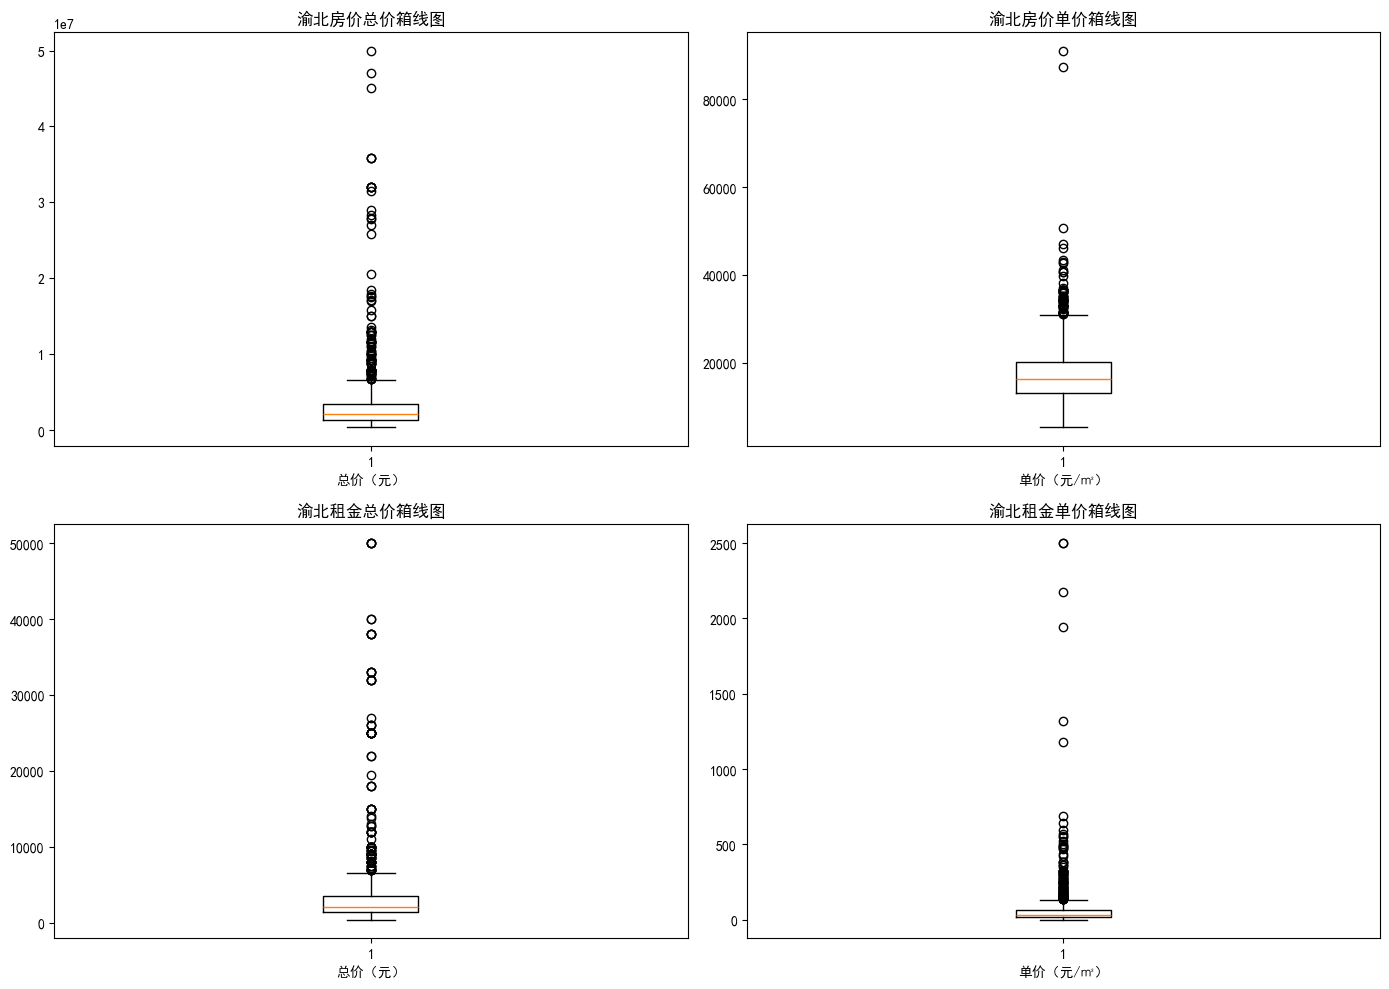

In [ ]:
import matplotlib.pyplot as plt

# 设置使用支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 打印描述性统计分析
print("渝北房价描述性统计：")
print(combined_df[(combined_df['地区'] == '渝北') & (combined_df['类型'] == '房价')].describe())
print("\n渝北租金描述性统计：")
print(combined_df[(combined_df['地区'] == '渝北') & (combined_df['类型'] == '租金')].describe())

# 检测异常值
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# 绘制渝北房价总价的箱线图
axes[0, 0].boxplot(combined_df[(combined_df['地区'] == '渝北') & (combined_df['类型'] == '房价')]['总价（元）'].dropna())
axes[0, 0].set_title('渝北房价总价箱线图')
axes[0, 0].set_xlabel('总价（元）')

# 绘制渝北房价单价的箱线图
axes[0, 1].boxplot(combined_df[(combined_df['地区'] == '渝北') & (combined_df['类型'] == '房价')]['单价（元/㎡）'].dropna())
axes[0, 1].set_title('渝北房价单价箱线图')
axes[0, 1].set_xlabel('单价（元/㎡）')

# 绘制渝北租金总价的箱线图
axes[1, 0].boxplot(combined_df[(combined_df['地区'] == '渝北') & (combined_df['类型'] == '租金')]['总价（元）'].dropna())
axes[1, 0].set_title('渝北租金总价箱线图')
axes[1, 0].set_xlabel('总价（元）')

# 绘制渝北租金单价的箱线图
axes[1, 1].boxplot(combined_df[(combined_df['地区'] == '渝北') & (combined_df['类型'] == '租金')]['单价（元/㎡）'].dropna())
axes[1, 1].set_title('渝北租金单价箱线图')
axes[1, 1].set_xlabel('单价（元/㎡）')

plt.tight_layout()
plt.show()


3(2) 房价租金比的中位数计算+绘图

每个地区的房价租金比中位数：
地区
南岸   453
江北   515
渝中   382
渝北   533
Name: 单价（元/㎡）, dtype: float64


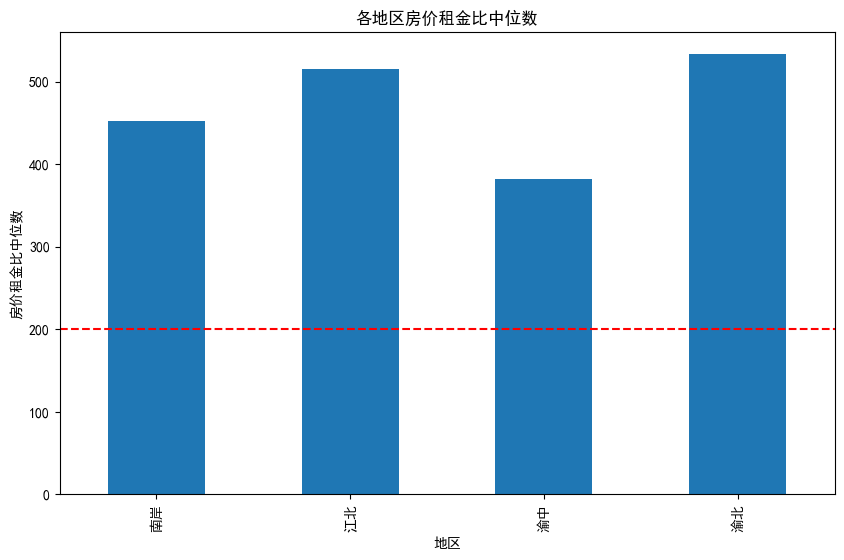

In [ ]:
# 计算每个地区的房价单价中位数和租金单价中位数
median_price_per_block = combined_df[combined_df['类型'] == '房价'].groupby('地区')['单价（元/㎡）'].median()
median_rent_per_block = combined_df[combined_df['类型'] == '租金'].groupby('地区')['单价（元/㎡）'].median()

# 计算每个地区的房价租金比中位数
price_to_rent_ratio = median_price_per_block / median_rent_per_block

print("每个地区的房价租金比中位数：")
print(price_to_rent_ratio)

# 绘制每个地区的房价租金比中位数的条形图
fig, ax = plt.subplots(figsize=(10, 6))
price_to_rent_ratio.plot(kind='bar', ax=ax)
ax.set_title('各地区房价租金比中位数')
ax.set_xlabel('地区')
ax.set_ylabel('房价租金比中位数')
ax.axhline(y=200, color='r', linestyle='--')  # 加入全球水平线

plt.show()


3(4) 模型建立+预测

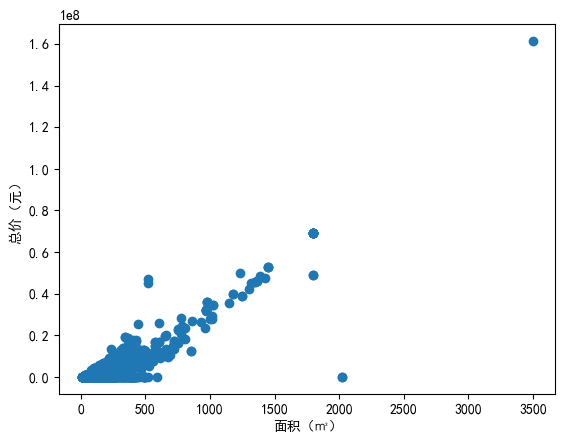

                            OLS Regression Results                            
Dep. Variable:                  总价（元）   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     5755.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:32:42   Log-Likelihood:                -71607.
No. Observations:                4687   AIC:                         1.432e+05
Df Residuals:                    4684   BIC:                         1.432e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.948e+05   4.23e+04    -18.800      0.0

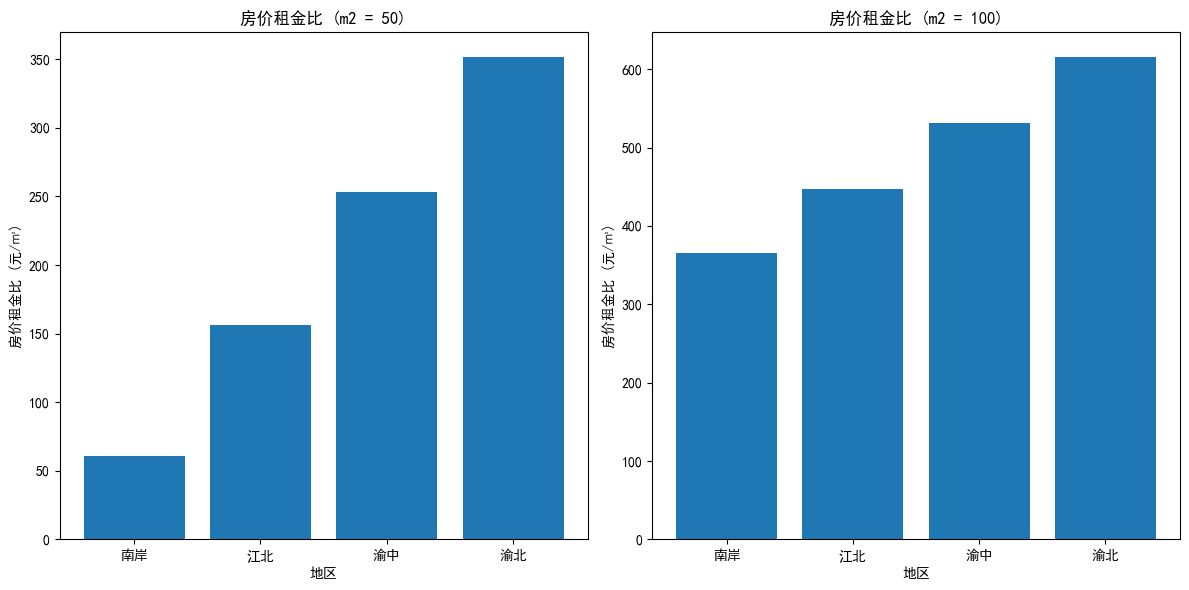

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

csv_file_path = r"C:\Users\86158\Desktop\HW3\combined_rent_and_housing_prices.csv"
data = pd.read_csv(csv_file_path)


## (1)数据预处理
# 按地区进行编码
label_encoder = LabelEncoder()
data['地区_encoded'] = label_encoder.fit_transform(data['地区'])

# 拆分数据为房价数据和租金数据
housing_data = data[data['类型'] == '房价']
rental_data = data[data['类型'] == '租金']

# 绘制散点图查看面积与总价的关系，大致观测出数据的状况
plt.scatter(data['面积（㎡）'], data['总价（元）'])
plt.xlabel('面积（㎡）')
plt.ylabel('总价（元）')
plt.show()

# 使用 IQR 方法识别并处理异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

housing_data = remove_outliers(housing_data, '总价（元）')
rental_data = remove_outliers(rental_data, '总价（元）')


## (2)模型拟合
# 添加常数项以拟合截距
X_housing = housing_data[['面积（㎡）', '地区_encoded']]
X_rental = rental_data[['面积（㎡）', '地区_encoded']]
X_housing = sm.add_constant(X_housing)
X_rental = sm.add_constant(X_rental)

# 拟合模型
model_housing = sm.OLS(housing_data['总价（元）'], X_housing).fit()
model_rental = sm.OLS(rental_data['总价（元）'], X_rental).fit()

# 打印房价模型和租金模型的系数
print(model_housing.summary())
print(model_rental.summary())


## (3)预测
areas_to_predict = [50, 100]
predicted_prices = {}
predicted_rents = {}

for area in areas_to_predict:
    for location in label_encoder.classes_:
        location_encoded = label_encoder.transform([location])[0]
        X_pred = np.array([[1, area, location_encoded]])
        predicted_price = model_housing.predict(X_pred)[0]
        predicted_rent = model_rental.predict(X_pred)[0]
        predicted_prices[(location, area)] = predicted_price
        predicted_rents[(location, area)] = predicted_rent

# 打印预测结果
print("房价预测结果 (单位：元)：")
for area in areas_to_predict:
    for location in label_encoder.classes_:
        price = predicted_prices[(location, area)]
        print(f"* {location} ({area} m²): {price:.2f}")

print("\n租金预测结果 (单位：元)：")
for area in areas_to_predict:
    for location in label_encoder.classes_:
        rent = predicted_rents[(location, area)]
        print(f"* {location} ({area} m²): {rent:.2f}")

'''''
此处m2=50的预测值被折叠到了“···”中，通过单独输出m2=50的预测值，得到如下数据：
# Notes:

# 绘制柱状图
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax, area in zip(axs, areas_to_predict):
    prices = [predicted_prices[(location, area)] for location in label_encoder.classes_]
    rents = [predicted_rents[(location, area)] for location in label_encoder.classes_]
    price_rent_ratios = [p/r for p, r in zip(prices, rents) if r != 0]
    
    ax.bar(label_encoder.classes_, price_rent_ratios)
    ax.set_title(f'房价租金比 (m2 = {area})')
    ax.set_xlabel('地区')
    ax.set_ylabel('房价租金比 (元/㎡)')

plt.tight_layout()
plt.show()
